In [43]:
import pandas as pd

In [44]:
import numpy as np

In [45]:
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns

In [47]:
import pickle

In [48]:
import os

In [49]:
%matplotlib inline

In [50]:
# importing the dataset
data = pd.read_csv("kc_house_data.csv")

In [51]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [52]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [53]:
data=data.drop(columns=['id', 'date',  'bathrooms', 'sqft_living',
       'sqft_lot',  'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'long', 'sqft_living15', 'sqft_lot15'])

In [54]:
data

,price,bedrooms,floors,lat
0,221900.0,3,1.0,47.5112
1,538000.0,3,2.0,47.7210
2,180000.0,2,1.0,47.7379
3,604000.0,4,1.0,47.5208
4,510000.0,3,1.0,47.6168
...,...,...,...,...
21608,360000.0,3,3.0,47.6993
21609,400000.0,4,2.0,47.5107
21610,402101.0,2,2.0,47.5944
21611,400000.0,3,2.0,47.5345


simple linear regression


In [55]:
#intializing the variables
x = data['bedrooms'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)


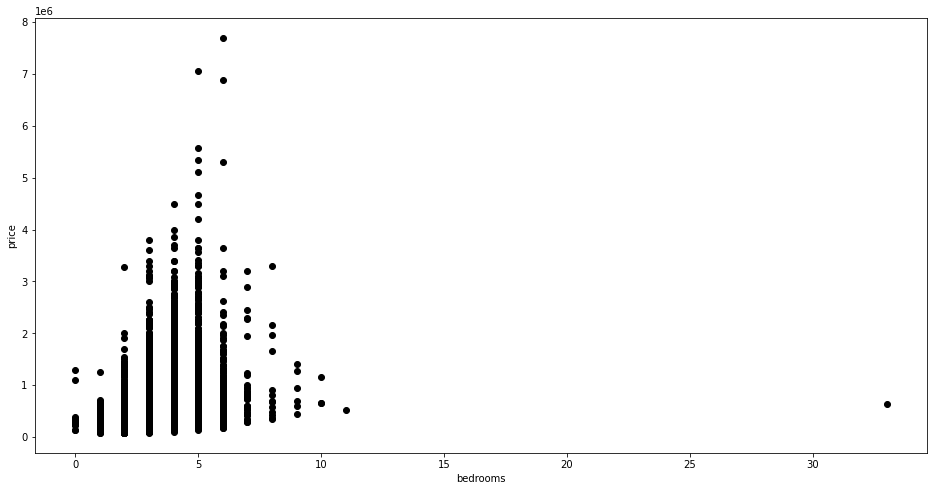

In [56]:
#plotting the graphs to see the points
plt.figure(figsize=(16,8))
plt.scatter(x,y,c = "black")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

In [57]:
#splitting the dataset into  training and testing the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

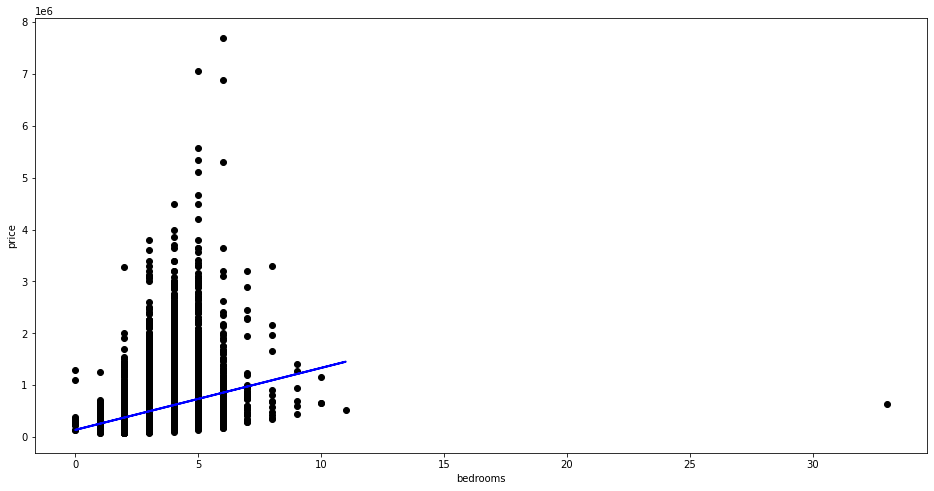

In [59]:
#predicting the test set result
y_pred = reg.predict(x_test)
plt.figure(figsize = (16,8))
plt.scatter(x,y,c = "black")
plt.plot(
    x_test,
    y_pred,
    c="blue",
    linewidth = 2
)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

In [60]:
#calculating the coefficient
reg.coef_

array([[119634.32393857]])

In [61]:
#calculating the intercept
reg.intercept_

array([134823.86896687])

In [62]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09436575511711587

In [63]:
output = reg.predict([[230.1]])
output

array([[27662681.8072328]])

Multiple linear regression


In [64]:
#initializing the variable
x = data.drop(['price'],axis = 1)
y = data['price'].values.reshape(-1,1)

In [65]:
#splitting our dataset to training and testing the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [66]:
#fitting linear regression  to the training set
from sklearn.linear_model import LinearRegression 
multiple_reg = LinearRegression()
multiple_reg.fit(x_train,y_train)

LinearRegression()

In [67]:
#prediciting the test set result
y_pred = multiple_reg.predict(x_test)

In [68]:
multiple_reg.coef_

array([[108547.05580476, 125596.80759963, 794589.4307033 ]])

In [69]:
multiple_reg.intercept_

array([-37807057.81631107])

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.22100276399716778

In [71]:
data.columns

Index(['price', 'bedrooms', 'floors', 'lat'], dtype='object')

In [72]:
#taking the input from the user
print("enter the amount you will invest on:")
bedrooms = float (input("bedrooms: "))
floors = float(input("floors:"))
lat = float(input("lat:"))
#prediciting the sales with respect to the inputs
output = multiple_reg.predict([[bedrooms, floors, lat]])
print("you will get Rs{:.2f} price by house Rs{} on bedrooms, Rs{}on floors and Rs{} on floors."\
    .format(output[0][0] if output else "not predictable",bedrooms, floors, lat))

enter the amount you will invest on:
bedrooms: 100
floors:100
lat:100
you will get Rs65066271.59 price by house Rs100.0 on bedrooms, Rs100.0on floors and Rs100.0 on floors.


In [73]:
#saving the model
if not os.path.exists('models'):
    os.makedirs('models')

MODEL_PATH = "models/multiple_reg.sav"
pickle.dump(multiple_reg,open(MODEL_PATH,'wb'))

In [74]:
from tkinter import *
import pickle

In [75]:
#loading the model
MODEL_PATH = "models/multiple_reg.sav"
loaded_model = pickle.load(open(MODEL_PATH,'rb'))

In [76]:
#calculating sales w.r.t input
def calculate_sale(arg):
    res = loaded_model.predict([[bedrooms.get(),floors.get(),lat.get()]])
    sale_label.config(text="Expected Sale : {:.2f}/-".format(res[0][0]))


In [77]:
#initializing the tkinter
master = Tk()
master.geometry("700x400")
master.configure(background = '#07575B')
master.title('Sales Estimater')

''

In [78]:
#label to show the estimate sale
sale_label = Label(master,bg = '#07575B',fg = "black" ,font = ("Times",40,"bold"),text = "Hello Tkinter!")
sale_label.pack(padx = 5,pady = 20)

In [79]:

#scale to take the TV advertising the investment amount from the user
bedrooms= Scale(master,length=650,label = "bedrooms",bg ="#c4DFE6",fg = "black",from_=0,to=2000,orient = HORIZONTAL,command = calculate_sale)
bedrooms.set(10)
bedrooms.pack(padx =5,pady =5)

In [80]:
#scale to take the TV advertising the investment amount from the user
floors = Scale(master,length=650,label = "floors",bg ="#C4DFE6",fg = "black",from_=0,to=2000,orient = HORIZONTAL,command = calculate_sale)
floors.set(10)
floors.pack(padx =5,pady =5)

In [81]:
#scale to take the TV advertising the investment amount from the user
lat= Scale(master,length=650,label = "Close",bg ="#C4DFE6",fg = "black",from_=0,to=2000,orient = HORIZONTAL,command = calculate_sale)
lat.set(10)
lat.pack(padx =5,pady =5)

In [ ]:
#show the application
mainloop()